In [1]:
import numpy as numpy
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 



In [2]:
income_df=pd.read_csv('Inc_Exp_Data.csv')

In [3]:
income_df.head()

Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
0             5000              8000                  3             2000   
1             6000              7000                  2             3000   
2            10000              4500                  2                0   
3            10000              2000                  1                0   
4            12500             12000                  2             3000   

   Annual_HH_Income Highest_Qualified_Member  No_of_Earning_Members  
0             64200           Under-Graduate                      1  
1             79920               Illiterate                      1  
2            112800           Under-Graduate                      1  
3             97200               Illiterate                      1  
4            147000                 Graduate                      1

In [4]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [5]:
income_df.shape

(50, 7)

In [6]:
income_df.describe().T

count       mean            std      min       25%  \
Mthly_HH_Income         50.0   41558.00   26097.908979   5000.0   23550.0   
Mthly_HH_Expense        50.0   18818.00   12090.216824   2000.0   10000.0   
No_of_Fly_Members       50.0       4.06       1.517382      1.0       3.0   
Emi_or_Rent_Amt         50.0    3060.00    6241.434948      0.0       0.0   
Annual_HH_Income        50.0  490019.04  320135.792123  64200.0  258750.0   
No_of_Earning_Members   50.0       1.46       0.734291      1.0       1.0   

                            50%       75%        max  
Mthly_HH_Income         35000.0   50375.0   100000.0  
Mthly_HH_Expense        15500.0   25000.0    50000.0  
No_of_Fly_Members           4.0       5.0        7.0  
Emi_or_Rent_Amt             0.0    3500.0    35000.0  
Annual_HH_Income       447420.0  594720.0  1404000.0  
No_of_Earning_Members       1.0       2.0        4.0

In [7]:
income_df.isna().any()

Mthly_HH_Income             False
Mthly_HH_Expense            False
No_of_Fly_Members           False
Emi_or_Rent_Amt             False
Annual_HH_Income            False
Highest_Qualified_Member    False
No_of_Earning_Members       False
dtype: bool

## Mean Expense of  a household

In [8]:
income_df['Mthly_HH_Expense'].mean()

np.float64(18818.0)

## Median Household Expense

In [9]:
income_df['Mthly_HH_Expense'].median()

15500.0

## Monthly Expense for most of the households

In [10]:
mth_exp_tmp=pd.crosstab(index=income_df["Mthly_HH_Expense"],columns='count')
mth_exp_tmp.reset_index(inplace=True)
mth_exp_tmp[mth_exp_tmp['count']==income_df.Mthly_HH_Expense.value_counts().max()]

col_0  Mthly_HH_Expense  count
18                25000      8

<Axes: xlabel='Highest_Qualified_Member'>

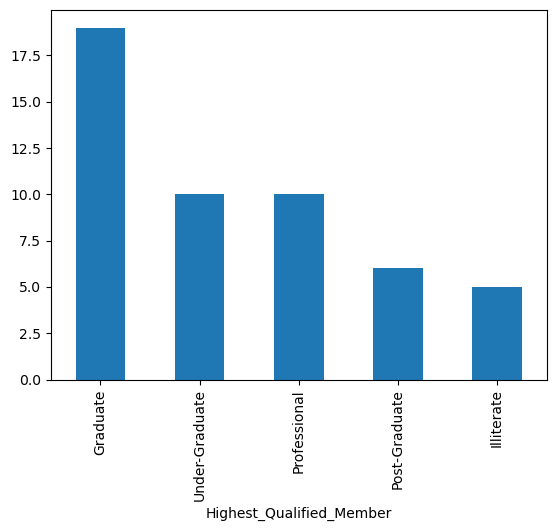

In [11]:
income_df["Highest_Qualified_Member"].value_counts().plot(kind="bar")

np.float64(15000.0)

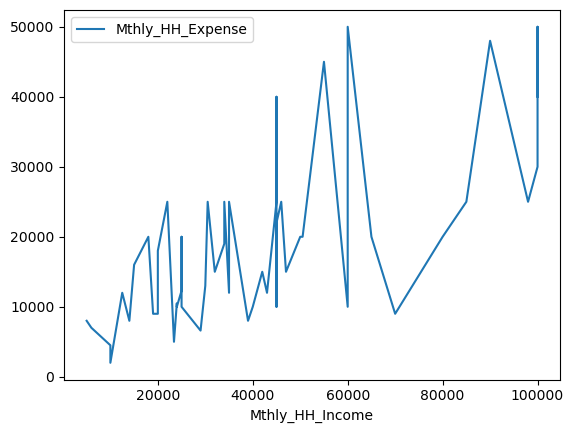

In [12]:
income_df.plot(x ="Mthly_HH_Income",y="Mthly_HH_Expense")
IQR=income_df["Mthly_HH_Expense"].quantile(0.75)-income_df["Mthly_HH_Expense"].quantile(0.25)
IQR

np.float64(5500.0)

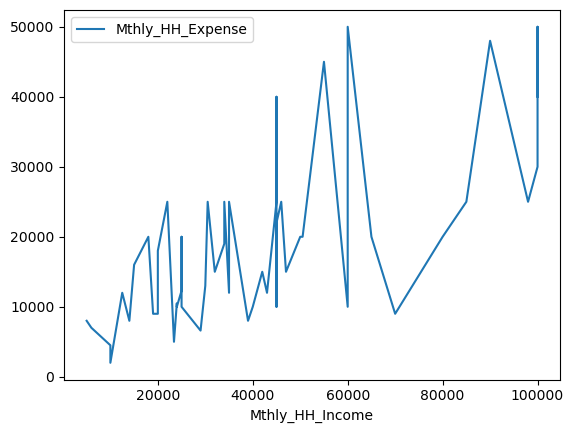

In [13]:
income_df.plot(x ="Mthly_HH_Income",y="Mthly_HH_Expense")
IQR=income_df["Mthly_HH_Expense"].quantile(0.50)-income_df["Mthly_HH_Expense"].quantile(0.25)
IQR

In [14]:
pd.DataFrame(income_df.iloc[:,0:5].std().to_frame()).T

Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
0     26097.908979      12090.216824           1.517382      6241.434948   

   Annual_HH_Income  
0     320135.792123

In [15]:
pd.DataFrame(income_df.iloc[:,0:4].var().to_frame()).T

Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt
0     6.811009e+08      1.461733e+08           2.302449     3.895551e+07

In [16]:
income_df["Highest_Qualified_Member"].value_counts().to_frame().T

Highest_Qualified_Member  Graduate  Under-Graduate  Professional  \
count                           19              10            10   

Highest_Qualified_Member  Post-Graduate  Illiterate  
count                                 6           5

<Axes: xlabel='No_of_Earning_Members'>

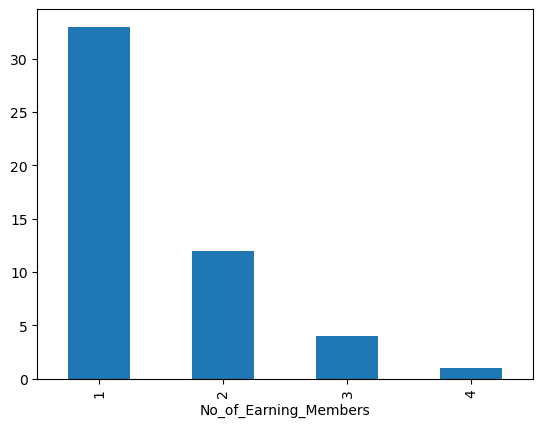

In [17]:
income_df["No_of_Earning_Members"].value_counts().plot(kind="bar")